This notebook demonstrates the procedure followed to select the number of dimensions in the final embedding

In [10]:
import pickle
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import itertools
from numpy.linalg import eigh

In [11]:
with open('embedding256.pickle', 'rb') as fp:
    embedding256 = pickle.load(fp)
    print(type(embedding256))

with open('label_info.pickle', 'rb') as fp:
    label_info = pickle.load(fp)
    print(type(label_info))

print(embedding256.keys())
print(label_info.keys())

<class 'dict'>
<class 'dict'>
dict_keys(['embed_all', 'embed_raw', 'embed_l2_norm', 'restore_order', 'embed_correct_coverage_fh', 'embed_l2_norm_correct_coverage_fh'])
dict_keys(['batch id', 'age', 'total_cg', 'average_cg_rate', 'total_ch', 'average_ch_rate', 'hic_counts', 'cell_name_higashi', 'major', 'minor', 'cluster label', 'cluster label minor'])


In [29]:
major_labels = label_info['cluster label']
minor_labels = label_info['cluster label minor']

In [34]:
maj1 = [0.0 for i in range(256)]
maj2 = [0.0 for i in range(256)]
maj3 = [0.0 for i in range(256)]
maj4 = [0.0 for i in range(256)]
min1 = [0.0 for i in range(256)]
min2 = [0.0 for i in range(256)]
min3 = [0.0 for i in range(256)]
min4 = [0.0 for i in range(256)]

for i in range(256):
    maj1[i] = silhouette_score(embedding256['embed_raw'][:, 0:i+1],major_labels)
    maj2[i] = silhouette_score(embedding256['embed_l2_norm'][:, 0:i+1],major_labels)
    maj3[i] = silhouette_score(embedding256['embed_correct_coverage_fh'][:, 0:i+1],major_labels)
    maj4[i] = silhouette_score(embedding256['embed_l2_norm_correct_coverage_fh'][:, 0:i+1],major_labels)
    
    min1[i] = silhouette_score(embedding256['embed_raw'][:, 0:i+1],minor_labels)
    min2[i] = silhouette_score(embedding256['embed_l2_norm'][:, 0:i+1],minor_labels)
    min3[i] = silhouette_score(embedding256['embed_correct_coverage_fh'][:, 0:i+1],minor_labels)
    min4[i] = silhouette_score(embedding256['embed_l2_norm_correct_coverage_fh'][:, 0:i+1],minor_labels)

    print(i+1, "of 256")

1 of 256
2 of 256
3 of 256
4 of 256
5 of 256
6 of 256
7 of 256
8 of 256
9 of 256
10 of 256
11 of 256
12 of 256
13 of 256
14 of 256
15 of 256
16 of 256
17 of 256
18 of 256
19 of 256
20 of 256
21 of 256
22 of 256
23 of 256
24 of 256
25 of 256
26 of 256
27 of 256
28 of 256
29 of 256
30 of 256
31 of 256
32 of 256
33 of 256
34 of 256
35 of 256
36 of 256
37 of 256
38 of 256
39 of 256
40 of 256
41 of 256
42 of 256
43 of 256
44 of 256
45 of 256
46 of 256
47 of 256
48 of 256
49 of 256
50 of 256
51 of 256
52 of 256
53 of 256
54 of 256
55 of 256
56 of 256
57 of 256
58 of 256
59 of 256
60 of 256
61 of 256
62 of 256
63 of 256
64 of 256
65 of 256
66 of 256
67 of 256
68 of 256
69 of 256
70 of 256
71 of 256
72 of 256
73 of 256
74 of 256
75 of 256
76 of 256
77 of 256
78 of 256
79 of 256
80 of 256
81 of 256
82 of 256
83 of 256
84 of 256
85 of 256
86 of 256
87 of 256
88 of 256
89 of 256
90 of 256
91 of 256
92 of 256
93 of 256
94 of 256
95 of 256
96 of 256
97 of 256
98 of 256
99 of 256
100 of 256
101 of 2

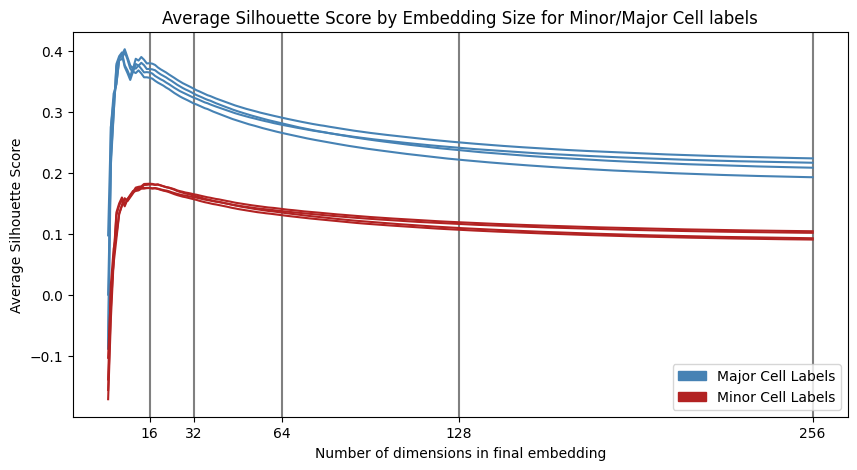

In [57]:
# plot
x = list(range(1,257))

fig, (ax1) = plt.subplots(1)
fig.set_size_inches(10, 5)

# ax1.set_ylim([0, 0.85])
# ax1.axhline(y=0.79842, color="gray", linestyle='dotted')
# ax1.axhline(y=0.70, color="gray")
ax1.axvline(x=16, color="gray")
ax1.axvline(x=32, color="gray")
ax1.axvline(x=64, color="gray")
ax1.axvline(x=128, color="gray")
ax1.axvline(x=256, color="gray")
ax1.plot(x,maj1, color="steelblue")
ax1.plot(x,maj2, color="steelblue")
ax1.plot(x,maj3, color="steelblue")
ax1.plot(x,maj4, color="steelblue")
ax1.plot(x,min1, color="firebrick")
ax1.plot(x,min2, color="firebrick")
ax1.plot(x,min3, color="firebrick")
ax1.plot(x,min4, color="firebrick")
ax1.set_xlabel('Number of dimensions in final embedding')
ax1.set_ylabel('Average Silhouette Score')
ax1.set_title('Average Silhouette Score by Embedding Size for Minor/Major Cell labels')
ax1.set_xticks([16,32,64,128,256])
ax1.legend(handles=[mpatches.Patch(color="steelblue", label="Major Cell Labels"),
                   mpatches.Patch(color="firebrick", label="Minor Cell Labels")], loc='lower right')
plt.show()
fig.savefig("Final/Silhouette.png")

In [50]:
### calculate explained variance component analysis
### source: https://vitalflux.com/pca-explained-variance-concept-python-example/

# estimate a covariance matrix for embedding
cov_matrix = np.cov(embedding256['embed_raw'], rowvar=False)

# return eigenvalues and eigenvectors
egnvalues, egnvectors = eigh(cov_matrix)

# calculate explained variance ratio 
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
cum_sum_exp = np.cumsum(var_exp)

In [53]:
### calculate explained variance component analysis
### source: https://vitalflux.com/pca-explained-variance-concept-python-example/

def explained_variance(embedding):
    # estimate a covariance matrix for embedding
    cov_matrix = np.cov(embedding, rowvar=False)
    
    # return eigenvalues and eigenvectors
    egnvalues, egnvectors = eigh(cov_matrix)
    
    # calculate explained variance ratio 
    total_egnvalues = sum(egnvalues)
    var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

    # return cumulative explained variance    
    return(np.cumsum(var_exp))

In [54]:
explained_var1 = explained_variance(embedding256['embed_raw'])
explained_var2 = explained_variance(embedding256['embed_l2_norm'])
explained_var3 = explained_variance(embedding256['embed_correct_coverage_fh'])
explained_var4 = explained_variance(embedding256['embed_l2_norm_correct_coverage_fh'])

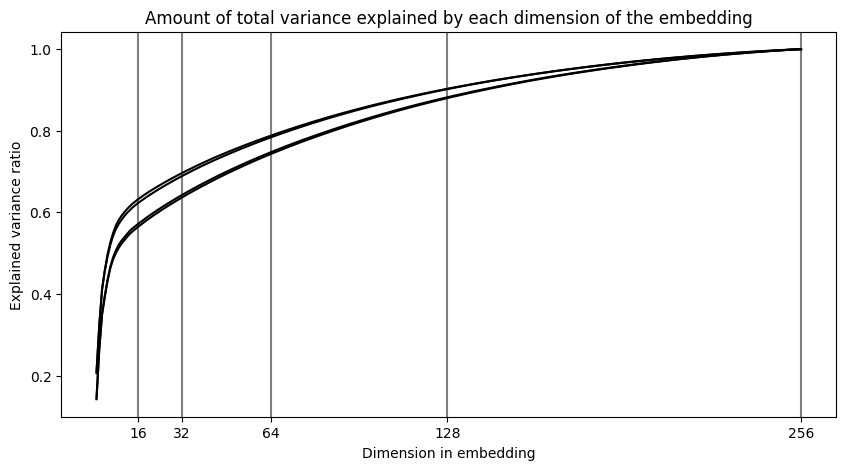

In [58]:
# create elbow plot
x = list(range(1,257))

fig, (ax1) = plt.subplots(1)
fig.set_size_inches(10, 5)

# ax1.set_ylim([0, 0.85])
# ax1.axhline(y=0.79842, color="gray", linestyle='dotted')
# ax1.axhline(y=0.70, color="gray")
ax1.axvline(x=16, color="gray")
ax1.axvline(x=32, color="gray")
ax1.axvline(x=64, color="gray")
ax1.axvline(x=128, color="gray")
ax1.axvline(x=256, color="gray")
ax1.plot(x,explained_var1, color="black")
ax1.plot(x,explained_var2, color="black")
ax1.plot(x,explained_var3, color="black")
ax1.plot(x,explained_var4, color="black")
ax1.set_xlabel('Dimension in embedding')
ax1.set_ylabel('Explained variance ratio')
ax1.set_title('Amount of total variance explained by each dimension of the embedding')
ax1.set_xticks([16,32,64,128,256])
# ax1.legend(handles=[mpatches.Patch(color="steelblue", label="Major Cell Labels"),
#                    mpatches.Patch(color="firebrick", label="Minor Cell Labels")], loc='lower right')
plt.show()
fig.savefig("Final/ExplainedVariance.png")